In [1]:
import maboss
import ginsim

# Visualizing the CRC model

In [8]:
crc_model = ginsim.load('./CRC_model_20230516.zginml')
ginsim.show(crc_model)

# Load CRC model

We first define all inputs as 0.5 to activate all possible pathway, plus we defining the DNA damage at 0.5 to mimic the process of DNA damage cause by radio/chemotherapy

In [9]:
fname = './CRC_model_20230516'
## Set up the required files
bnd_file = fname+".bnd"
cfg_WT = fname+".bnd.cfg"

## Load MaBoSS model
WT = maboss.load(bnd_file, cfg_WT)

## modify the max_time if necessary
## select the variables considered to be internal (not appearing in the resulting csv file) 
## run the model for random initial conditions (defined in the cfg file) or from all 0s initial conditions 

WT_allinputs = maboss.copy_and_update_parameters(WT, {'max_time':50})

## By default, all variables are external (in the cfg file: Node.is_internal = FALSE). 
## If the model is big, the computations may take a very long time.
## We advise to set as external, only the variables that are relevant for the analysis

## if you wish to put some values as internal (the ones that will not be used for the analysis), write (uncomment):
#for name in "ERK_1_2 MK2 p38 Wee1 BRAF CDK1 p21 TP53 Proliferation Senescence Apoptosis".split(' '):
for name in "TAK1 PI3K MTORC2 CDC25A CDK4_6 S6 JNK AKT p38 p21".split(' '):
     WT_allinputs.network[name].is_internal = True

## Select outputs for visualisation of the results
WT_allinputs.network.set_output(('Proliferation','Apoptosis','Mitotic_Catastrophe','DSB_SSB','Anaphase'))

## Set all inputs at 0.5
WT_allinputs.network.set_istate('EGF',[0.5,0.5])
WT_allinputs.network.set_istate('TGFb',[0.5,0.5])
WT_allinputs.network.set_istate('TNF',[0.5,0.5])
WT_allinputs.network.set_istate('Wnt',[0.5,0.5])
WT_allinputs.network.set_istate('IL1R1',[0.5,0.5])
WT_allinputs.network.set_istate('IFNA',[0.5,0.5])

## Put all inputs at random
for i in WT_allinputs.network.names:
    WT_allinputs.network.set_istate(i,[0.5,0.5])
WT_allinputs.network.set_istate('DSB_SSB',[1,0])
WT_allinputs.network.set_istate('GSK3B',[1,0])

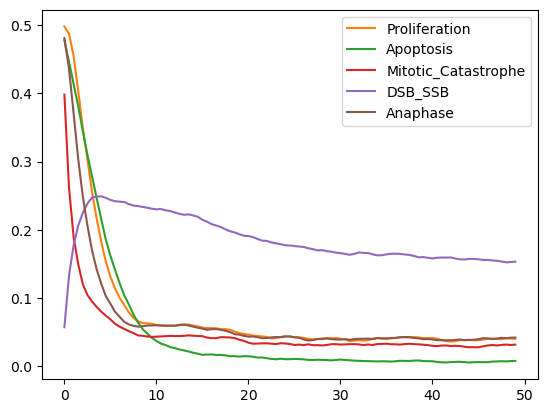

In [10]:
WT_res = WT_allinputs.run()
WT_res.plot_node_trajectory()
#WT_res.plot_trajectory()
#WT_res.plot_piechart()

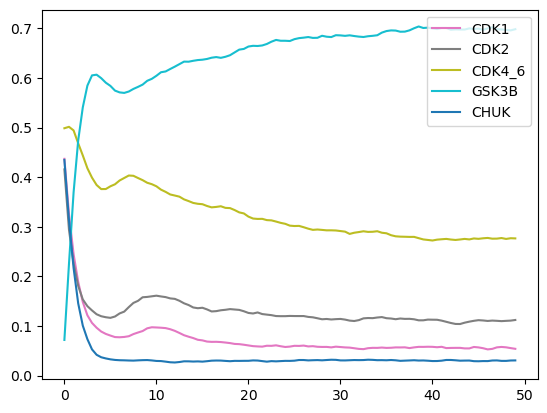

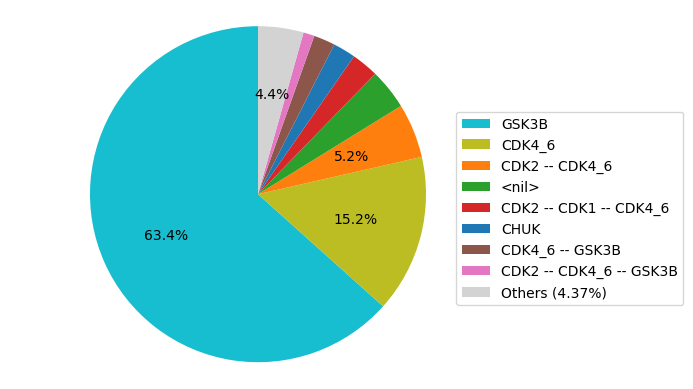

In [39]:
WT_allinputs.network.set_output(('CDK4_6','CDK2','CDK1','GSK3B','CHUK'))

WT_res = WT_allinputs.run()
WT_res.plot_node_trajectory()
WT_res.plot_piechart()

# Exploring the effect of KRAS and BRAF mutation

In [14]:
fname = './CRC_model_20230516'
## Set up the required files
bnd_file = fname+".bnd"
cfg_WT = fname+".bnd.cfg"

## Load MaBoSS model
WT = maboss.load(bnd_file, cfg_WT)

## modify the max_time if necessary
## select the variables considered to be internal (not appearing in the resulting csv file) 
## run the model for random initial conditions (defined in the cfg file) or from all 0s initial conditions 

WT_allinputs = maboss.copy_and_update_parameters(WT, {'max_time':50})

## By default, all variables are external (in the cfg file: Node.is_internal = FALSE). 
## If the model is big, the computations may take a very long time.
## We advise to set as external, only the variables that are relevant for the analysis

## if you wish to put some values as internal (the ones that will not be used for the analysis), write (uncomment):
#for name in "ERK_1_2 MK2 p38 Wee1 BRAF CDK1 p21 TP53 Proliferation Senescence Apoptosis".split(' '):
for name in "TAK1 PI3K MTORC2 CDC25A CDK4_6 S6 JNK AKT p38 p21".split(' '):
     WT_allinputs.network[name].is_internal = True

## Select outputs for visualisation of the results
WT_allinputs.network.set_output(('Proliferation','Apoptosis','Mitotic_Catastrophe','DSB_SSB','Anaphase'))

## Set all inputs at 0.5
WT_allinputs.network.set_istate('EGF',[0.5,0.5])
WT_allinputs.network.set_istate('TGFb',[0.5,0.5])
WT_allinputs.network.set_istate('TNF',[0.5,0.5])
WT_allinputs.network.set_istate('Wnt',[0.5,0.5])
WT_allinputs.network.set_istate('IL1R1',[0.5,0.5])
WT_allinputs.network.set_istate('IFNA',[0.5,0.5])

## Put all inputs at random
for i in WT_allinputs.network.names:
    WT_allinputs.network.set_istate(i,[0.5,0.5])
WT_allinputs.network.set_istate('DSB_SSB',[1,0])

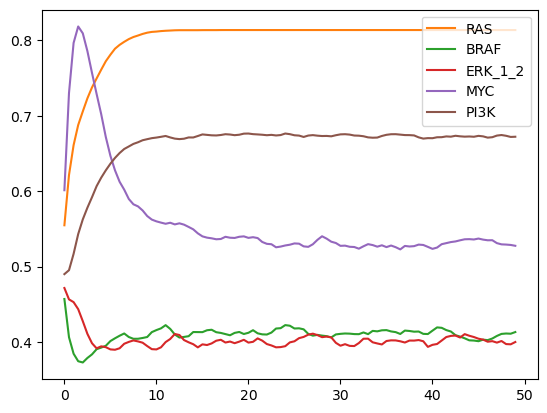

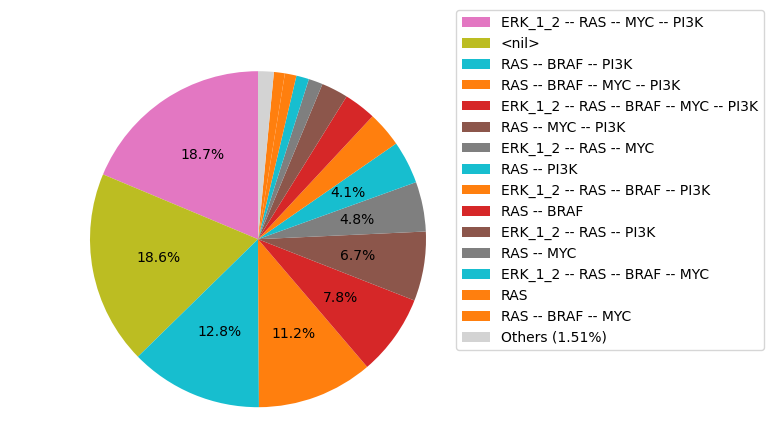

In [15]:
WT_allinputs.network.set_output(('RAS','BRAF','ERK_1_2','MYC','PI3K'))
WT_res = WT_allinputs.run()
WT_res.plot_node_trajectory()
WT_res.plot_piechart()

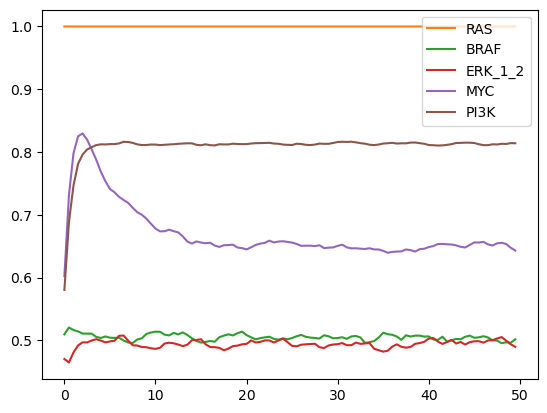

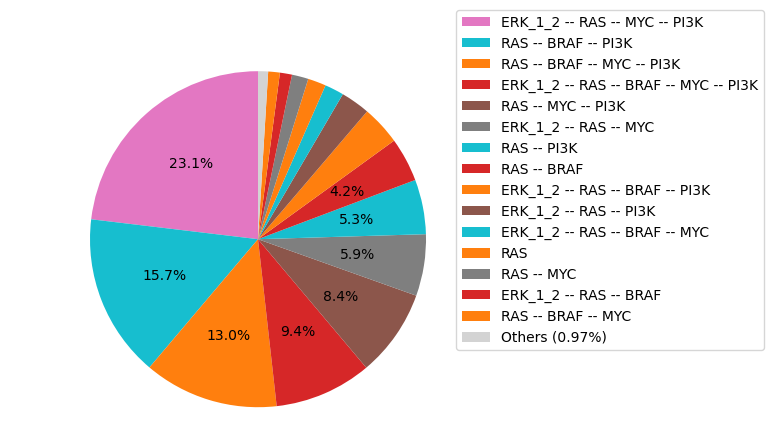

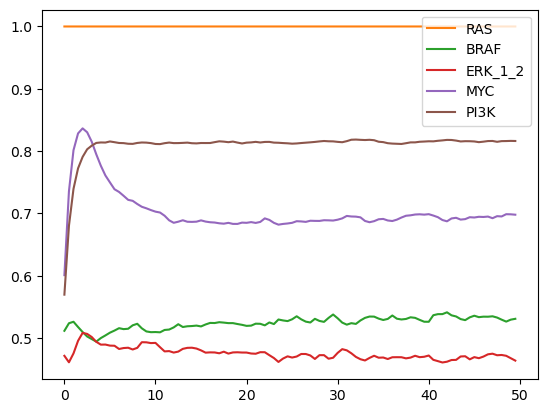

In [16]:
WT_KRAS = maboss.copy_and_mutate(WT_allinputs, nodes = ['RAS'], mut = 'ON')
WT_KRAS.network.set_output(('RAS','BRAF','ERK_1_2','MYC','PI3K'))

WT_KRAS_res = WT_KRAS.run()
WT_KRAS_res.plot_node_trajectory()
WT_KRAS_res.plot_piechart()

WT_KRAS.mutate(node = 'CHEK1', state = 'OFF')
WT_KRAS_res = WT_KRAS.run()
WT_KRAS_res.plot_node_trajectory()
#WT_KRAS_res.plot_piechart()

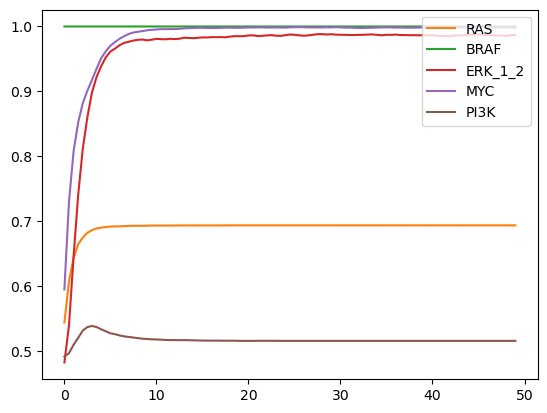

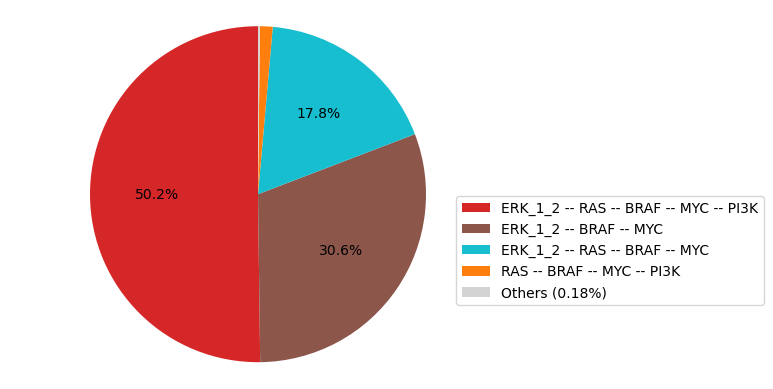

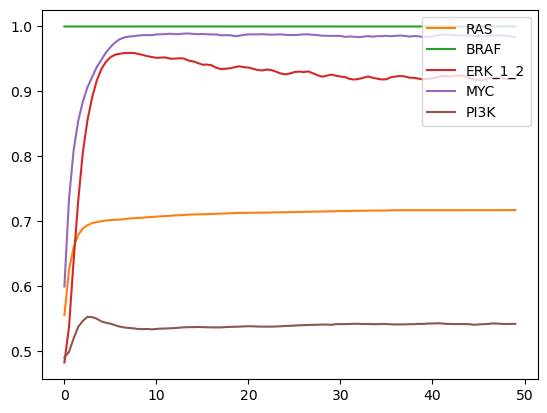

In [17]:
WT_BRAF = maboss.copy_and_mutate(WT_allinputs, nodes = ['BRAF'], mut = 'ON')
WT_BRAF.network.set_output(('RAS','BRAF','ERK_1_2','MYC','PI3K'))
WT_BRAF_res = WT_BRAF.run()
WT_BRAF_res.plot_node_trajectory()
WT_BRAF_res.plot_piechart()

WT_BRAF.mutate(node = 'CHEK1', state = 'OFF')
WT_BRAF_res = WT_BRAF.run()
WT_BRAF_res.plot_node_trajectory()
#WT_BRAF_res.plot_piechart()

# Exploring the effect of CHEK1 inhibition

,Anaphase,Apoptosis,DSB_SSB,Mitotic_Catastrophe,Proliferation
0.0,0.490664,0.484518,0.017414,0.395425,0.504363
0.5,0.446950,0.447877,0.049505,0.247572,0.495226
1.0,0.388172,0.409611,0.076893,0.163779,0.465984
1.5,0.334909,0.371989,0.099455,0.116701,0.427372
2.0,0.283403,0.330194,0.119415,0.091623,0.381951
...,...,...,...,...,...
47.0,0.214985,0.013760,0.634468,0.215624,0.217721
47.5,0.216441,0.013661,0.634883,0.214360,0.216811
48.0,0.215467,0.013101,0.635366,0.212601,0.217043
48.5,0.213076,0.013089,0.635825,0.213312,0.215609


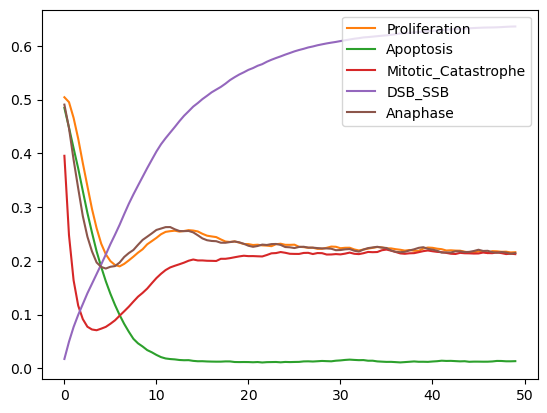

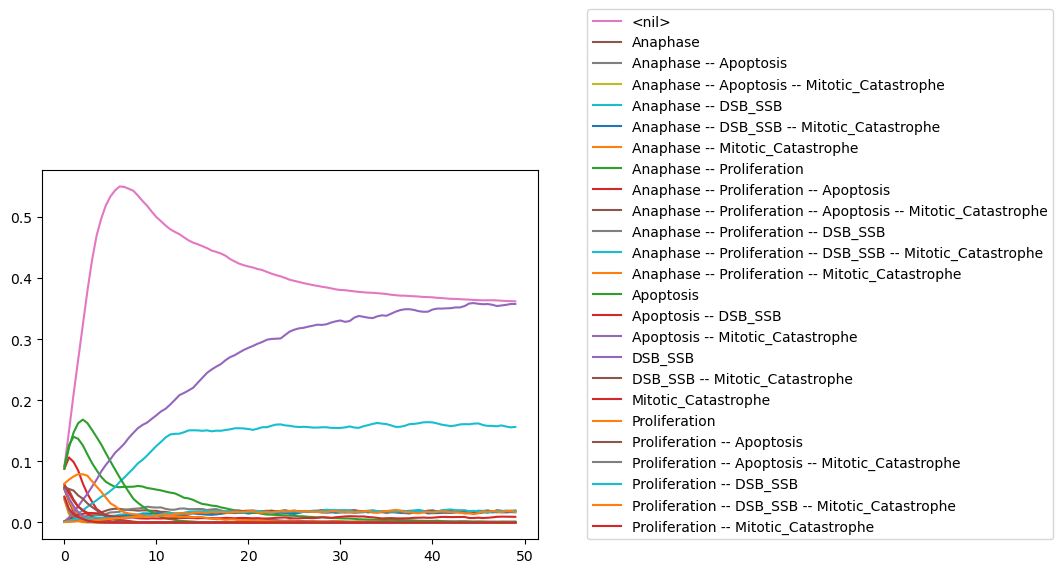

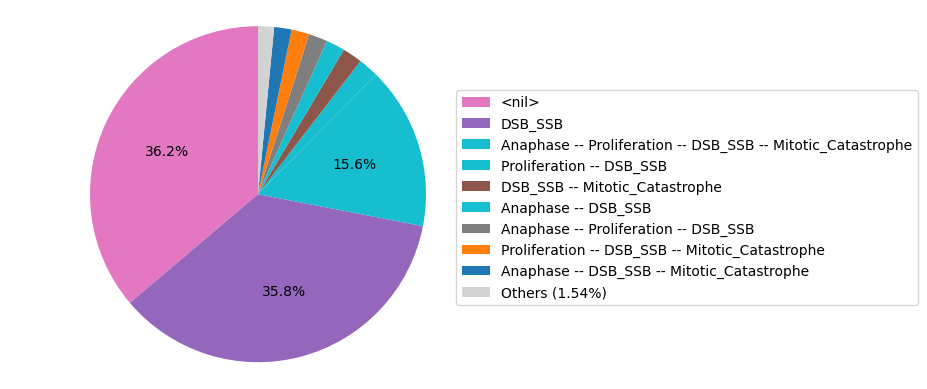

In [5]:
WT_allinputs.mutate(node = 'CHEK1', state = 'OFF')
WT_allinputs.network.set_output(('Proliferation','Apoptosis','Mitotic_Catastrophe','DSB_SSB','Anaphase'))
WT_res = WT_allinputs.run()
WT_res.plot_node_trajectory()
WT_res.plot_trajectory()
WT_res.plot_piechart()
WT_res.get_nodes_probtraj()

,Anaphase,Apoptosis,DSB_SSB,Mitotic_Catastrophe,Proliferation
0.0,0.489844,0.488737,0.018580,0.391083,0.499801
0.5,0.446592,0.455885,0.051432,0.239701,0.487209
1.0,0.391468,0.416070,0.076480,0.155265,0.460681
1.5,0.345111,0.371725,0.102598,0.110308,0.420584
2.0,0.307547,0.327003,0.123113,0.088649,0.380270
...,...,...,...,...,...
47.0,0.450578,0.014960,0.639911,0.444779,0.450455
47.5,0.451362,0.014785,0.640163,0.446763,0.451585
48.0,0.450399,0.014430,0.640396,0.446277,0.451909
48.5,0.448348,0.013878,0.640785,0.446472,0.450070


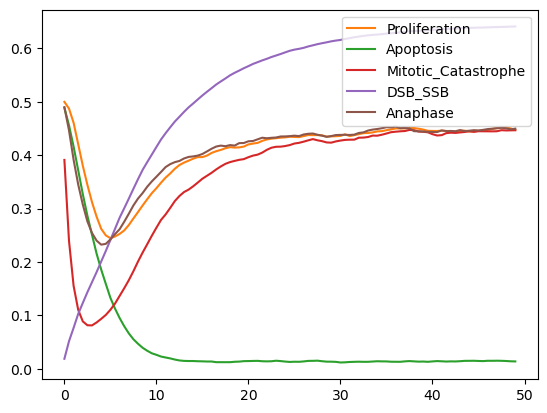

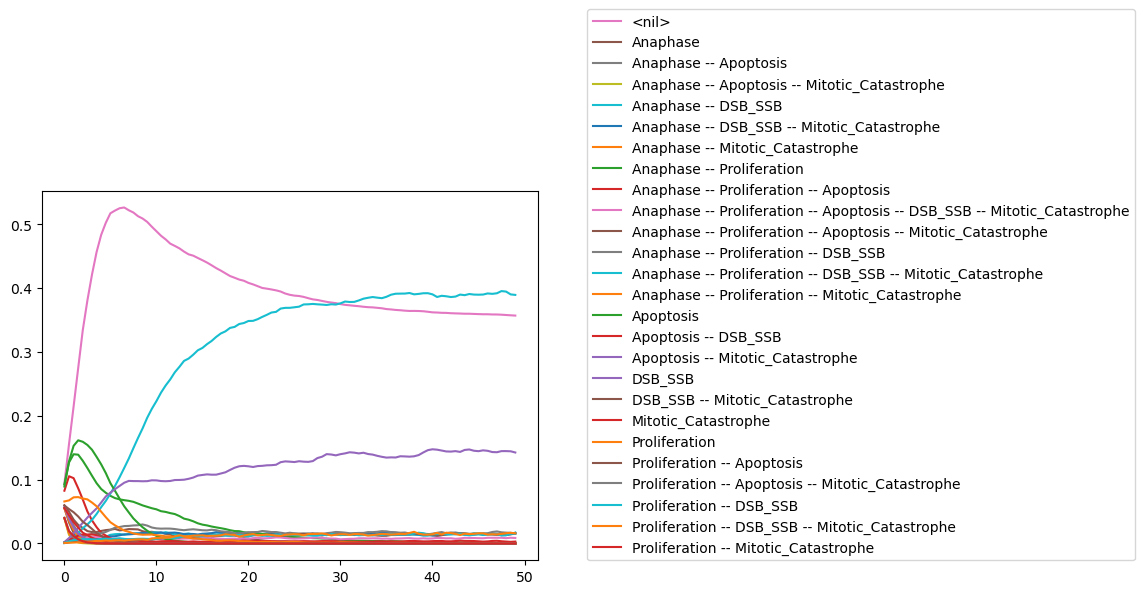

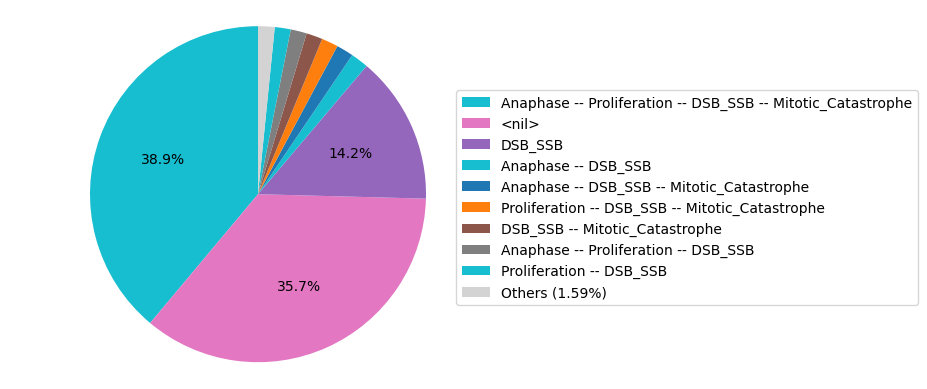

In [6]:
WT_allinputs.mutate(node = 'MK2', state = 'OFF')
WT_allinputs.network.set_output(('Proliferation','Apoptosis','Mitotic_Catastrophe','DSB_SSB','Anaphase'))
WT_res = WT_allinputs.run()
WT_res.plot_node_trajectory()
WT_res.plot_trajectory()
WT_res.plot_piechart()
WT_res.get_nodes_probtraj()

,CDK1,CDK2,CDK4_6,p21,p38
0.0,0.437105,0.422510,0.450607,0.413722,0.391109
0.5,0.343234,0.306544,0.396181,0.288581,0.244031
1.0,0.287473,0.257707,0.370323,0.201120,0.162644
1.5,0.256749,0.234907,0.354702,0.139768,0.122251
2.0,0.240112,0.227566,0.340186,0.096460,0.102697
...,...,...,...,...,...
47.0,0.456922,0.457080,0.458641,0.000000,0.320053
47.5,0.456647,0.455965,0.460588,0.000000,0.318466
48.0,0.457510,0.455126,0.459801,0.000000,0.323171
48.5,0.457607,0.457176,0.459117,0.000000,0.322523


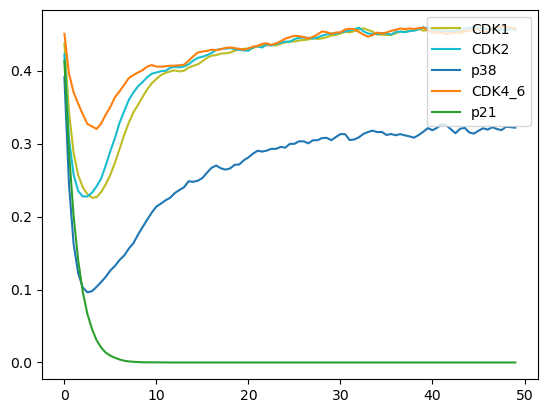

In [7]:
WT_allinputs.network.set_output(('CDK4_6','CDK2','CDK1','p38','p21'))
WT_res = WT_allinputs.run()
WT_res.plot_node_trajectory()
#WT_res.plot_trajectory()
WT_res.get_nodes_probtraj()